In [2]:
import pandas as pd
import numpy as np
import codecs
import io
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [3]:
def merge_two_dicts(x, y):
    z = x.copy()   # start with x's keys and values
    z.update(y)    # modifies z with y's keys and values & returns None
    return z

class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)

gender_type1
              coef     absol
2016      0.394315  0.394315
hillary   0.267130  0.267130
october   0.248447  0.248447
us        0.219025  0.219025
november  0.211233  0.211233


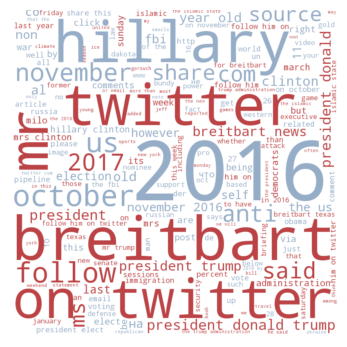

gender_adv
              coef     absol
2016      0.394315  0.394315
hillary   0.267130  0.267130
october   0.248447  0.248447
us        0.219025  0.219025
november  0.211233  0.211233


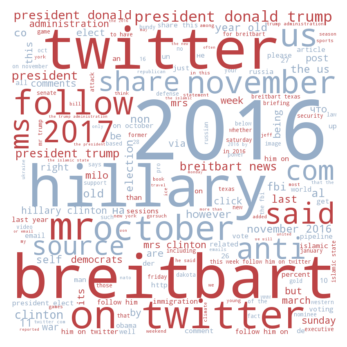

age_type1
              coef     absol
2016      0.394315  0.394315
hillary   0.267130  0.267130
october   0.248447  0.248447
us        0.219025  0.219025
november  0.211233  0.211233


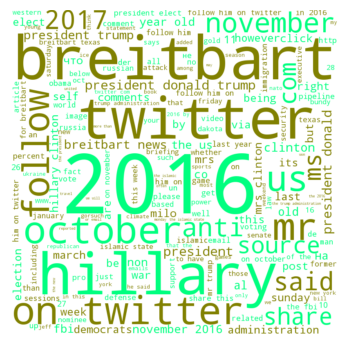

age_adv
              coef     absol
2016      0.394315  0.394315
hillary   0.267130  0.267130
october   0.248447  0.248447
us        0.219025  0.219025
november  0.211233  0.211233


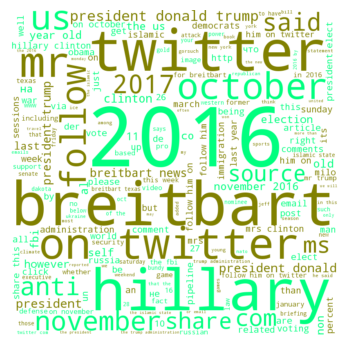

In [4]:
#m='5000-5gram-l1_'
m='10000-5gram-l1_'
#m='1000-2gram-l1_class1feat’ #bare til filnavnet på koefficientfilen

n = 100


for dom in ['gender_type1', 'gender_adv','age_type1', 'age_adv']:
    if 'gender' in dom:
        colors = ('#BC4345', '#96ADC7')  #farver til ordskyen
    elif 'age' in dom:
        colors = ('olive', 'springgreen')
    try:
        coefs = pd.read_csv('allcoefs_10000-5gram-l1_.csv', sep='\t') #pd.read_csv('coefs'+m+'.csv', sep='\t')
    except IOError:
        continue
    print(dom)
    coefs.columns = [s.replace('_', ' ') for s in coefs.columns]
    coefs = coefs.T
    coefsav = pd.DataFrame(coefs.mean(axis=1), columns=['coef']) #denne skal du ikke bruge
    coefsav['absol'] = abs(coefsav)
    #coefsav['stdev'] = coefs.std(axis=1)
    #coefsav['mean-std'] = coefsav.absol - coefsav.stdev
    coefsav.sort_values(by='coef', inplace=True, ascending=False)
    print(coefsav.head())

    wordcloud = WordCloud(background_color="white", collocations=True, width = 800, height = 800)
    wordcloud.generate_from_frequencies(frequencies=merge_two_dicts(coefsav.head(n).to_dict(orient='dict')['absol'], coefsav.tail(n).to_dict(orient='dict')['absol']))
    color_to_words = {}
    color_to_words[colors[0]] = list(coefsav.loc[coefsav.coef<0].index)
    color_to_words[colors[1]] = list(coefsav.loc[coefsav.coef>0].index)
    default_color = 'gray'
    grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)
    wordcloud.recolor(color_func=grouped_color_func)

    fig = plt.figure(figsize=[6,6])
    ax = fig.add_subplot(111)
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)

    plt.savefig('wordcloud_'+m+'.pdf', bbox_inches = 'tight', pad_inches = 0, dpi=600)
    plt.show()